## Predicting Survival on the Titanic

### History
Perhaps one of the most infamous shipwrecks in history, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 people on board. Interestingly, by analysing the probability of survival based on few attributes like gender, age, and social status, we can make very accurate predictions on which passengers would survive. Some groups of people were more likely to survive than others, such as women, children, and the upper-class. Therefore, we can learn about the society priorities and privileges at the time.

### Assignment:

Build a Machine Learning Pipeline, to engineer the features in the data set and predict who is more likely to Survive the catastrophe.

Follow the Jupyter notebook below, and complete the missing bits of code, to achieve each one of the pipeline steps.

In [75]:
import re

# to handle datasets
import pandas as pd
import numpy as np

# for visualization
import matplotlib.pyplot as plt

# to divide train and test set
from sklearn.model_selection import train_test_split

# feature scaling
from sklearn.preprocessing import StandardScaler

# to build the models
from sklearn.linear_model import LogisticRegression

# to evaluate the models
from sklearn.metrics import accuracy_score, roc_auc_score

# to persist the model and the scaler
import joblib

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

## Prepare the data set

In [76]:
# load the data - it is available open source and online

data = pd.read_csv('https://www.openml.org/data/get_csv/16826755/phpMYEkMl')

# display data
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,?,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22 C26,S,11,?,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.55,C22 C26,S,?,135,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"


In [77]:
# replace interrogation marks by NaN values

data = data.replace('?', np.nan)

In [78]:
# retain only the first cabin if more than
# 1 are available per passenger

def get_first_cabin(row):
    try:
        return row.split()[0]
    except:
        return np.nan
    
data['cabin'] = data['cabin'].apply(get_first_cabin)

In [79]:
# extracts the title (Mr, Ms, etc) from the name variable

def get_title(passenger):
    line = passenger
    if re.search('Mrs', line):
        return 'Mrs'
    elif re.search('Mr', line):
        return 'Mr'
    elif re.search('Miss', line):
        return 'Miss'
    elif re.search('Master', line):
        return 'Master'
    else:
        return 'Other'
    
data['title'] = data['name'].apply(get_title)

In [80]:
# cast numerical variables as floats

data['fare'] = data['fare'].astype('float')
data['age'] = data['age'].astype('float')

In [81]:
# drop unnecessary variables

data.drop(labels=['name','ticket', 'boat', 'body','home.dest'], axis=1, inplace=True)

# display data
data.head()

,pclass,survived,sex,age,sibsp,parch,fare,cabin,embarked,title
0,1,1,female,29.0000,0,0,211.3375,B5,S,Miss
1,1,1,male,0.9167,1,2,151.5500,C22,S,Master
2,1,0,female,2.0000,1,2,151.5500,C22,S,Miss
3,1,0,male,30.0000,1,2,151.5500,C22,S,Mr
4,1,0,female,25.0000,1,2,151.5500,C22,S,Mrs


In [82]:
data.dtypes

pclass        int64
survived      int64
sex          object
age         float64
sibsp         int64
parch         int64
fare        float64
cabin        object
embarked     object
title        object
dtype: object

In [83]:
# save the data set

data.to_csv('titanic.csv', index=False)

## Data Exploration

### Find numerical and categorical variables

In [84]:
target = 'survived'

In [85]:
#write a code to find the number of numerical and categorical variables
vars_num=[]
vars_cat=[]
for col in data.columns:
    if data[col].dtypes=='O':
        vars_cat.append(col)
    else:
        vars_num.append(col)
vars_num.remove('survived')


print('Number of numerical variables: {}'.format(len(vars_num)))
print('Number of categorical variables: {}'.format(len(vars_cat)))

Number of numerical variables: 5
Number of categorical variables: 4


### Find missing values in variables

In [86]:
# find the missing vcalues in numerical variables
data[vars_num].isnull().mean()




pclass    0.000000
age       0.200917
sibsp     0.000000
parch     0.000000
fare      0.000764
dtype: float64

In [87]:
data['age']

0       29.0000
1        0.9167
2        2.0000
3       30.0000
4       25.0000
         ...   
1304    14.5000
1305        NaN
1306    26.5000
1307    27.0000
1308    29.0000
Name: age, Length: 1309, dtype: float64

In [88]:
# now in categorical variables
data[vars_cat].isnull().mean()




sex         0.000000
cabin       0.774637
embarked    0.001528
title       0.000000
dtype: float64

### Determine cardinality of categorical variables

In [89]:
#to find cardinality of categorical variables
data[vars_cat].nunique()

sex           2
cabin       181
embarked      3
title         5
dtype: int64

### Determine the distribution of numerical variables

C:\Users\Abhishek\AppData\Local\Temp\ipykernel_18632\3661432036.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[var],bins=50)


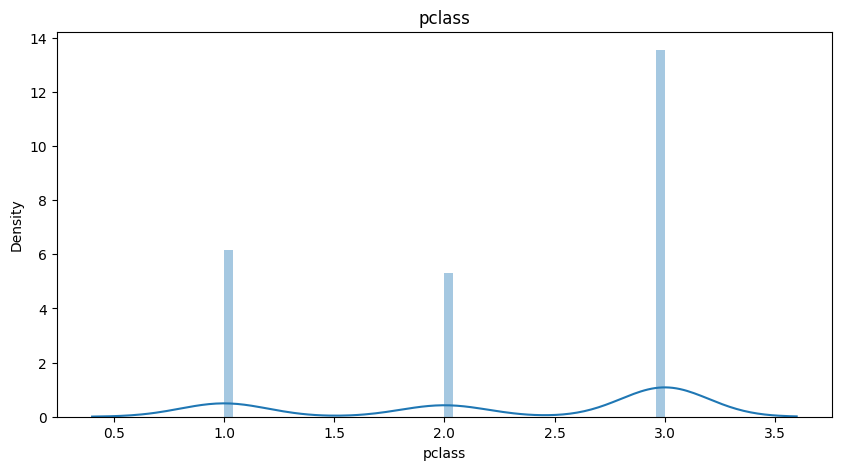

C:\Users\Abhishek\AppData\Local\Temp\ipykernel_18632\3661432036.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[var],bins=50)


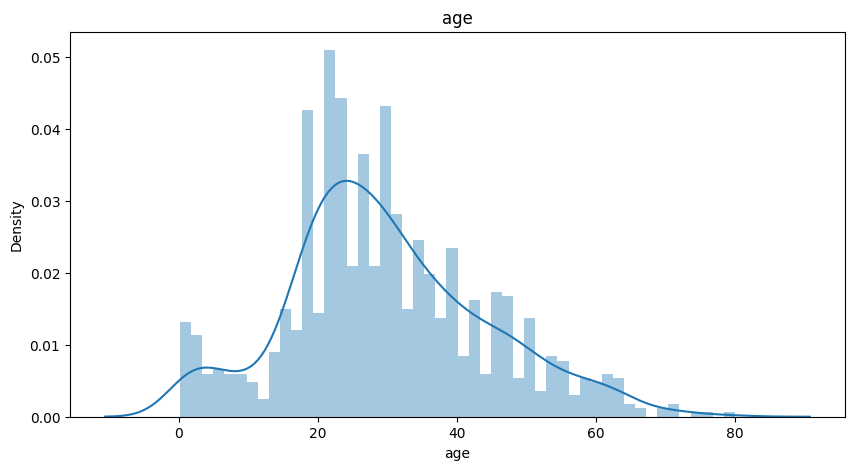

C:\Users\Abhishek\AppData\Local\Temp\ipykernel_18632\3661432036.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[var],bins=50)


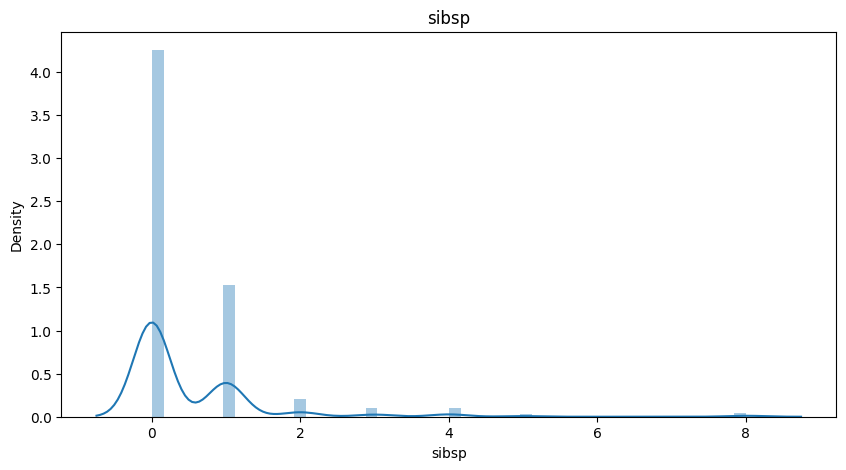

C:\Users\Abhishek\AppData\Local\Temp\ipykernel_18632\3661432036.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[var],bins=50)


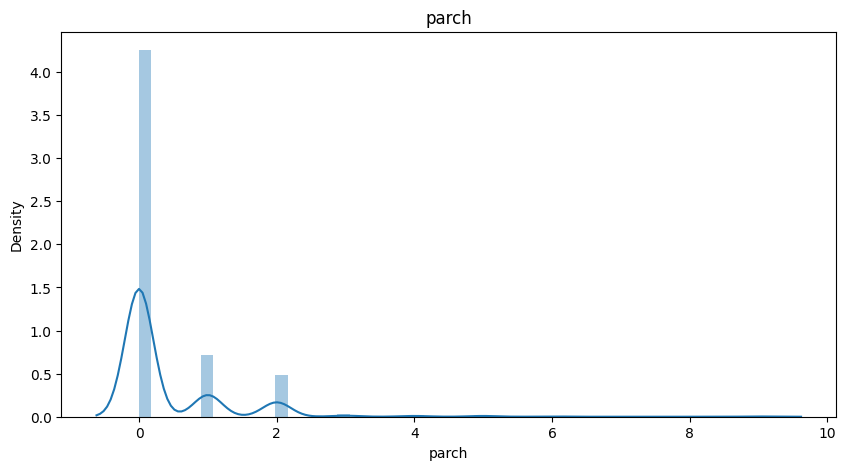

C:\Users\Abhishek\AppData\Local\Temp\ipykernel_18632\3661432036.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[var],bins=50)


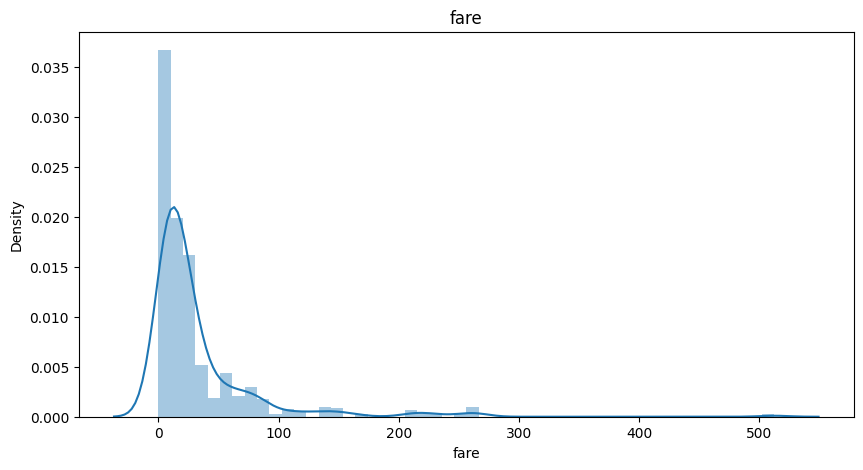

In [90]:
# to determine the distribution of pclass numerical variables.
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

#hsitogram for numerical variables
for var in vars_num:
    plt.figure(figsize=(10,5))
    sns.distplot(data[var],bins=50)
    plt.title(var)
    plt.show()






## Separate data into train and test

Use the code below for reproducibility. Don't change it.

In [91]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop('survived', axis=1),  # predictors
    data['survived'],  # target
    test_size=0.2,  # percentage of obs in test set
    random_state=0)  # seed to ensure reproducibility

X_train.shape, X_test.shape

((1047, 9), (262, 9))

## Feature Engineering

### Extract only the letter (and drop the number) from the variable Cabin

In [92]:
#checking unique values  in 'cabin' variable

X_train['cabin'].unique()

array([nan, 'E40', 'F', 'A19', 'C32', 'D', 'B79', 'C62', 'E8', 'D28',
       'C45', 'C46', 'B22', 'B57', 'C23', 'E44', 'B45', 'B39', 'B58',
       'F2', 'C47', 'B101', 'D21', 'A7', 'E52', 'F38', 'E36', 'C68',
       'E24', 'C22', 'D38', 'B50', 'A24', 'C111', 'C6', 'C87', 'C93',
       'D36', 'C125', 'B35', 'T', 'B73', 'A26', 'A18', 'B96', 'G6', 'C78',
       'C101', 'D9', 'D33', 'C128', 'E50', 'B26', 'B69', 'E121', 'C123',
       'B94', 'A34', 'C39', 'D43', 'E31', 'B5', 'D17', 'F33', 'D7', 'A21',
       'D34', 'A29', 'D35', 'A11', 'B51', 'D46', 'E60', 'C30', 'D26',
       'E68', 'A9', 'B71', 'D37', 'C55', 'C89', 'C124', 'C126', 'E49',
       'E46', 'D19', 'C82', 'B52', 'C92', 'E45', 'C65', 'E25', 'B3',
       'D40', 'C91', 'B102', 'B61', 'A20', 'B36', 'C7', 'B77', 'D20',
       'C148', 'C105', 'E38', 'B86', 'C132', 'C86', 'A14', 'C54', 'A5',
       'B49', 'B28', 'B24', 'C2', 'F4', 'A6', 'C83', 'B42', 'A36', 'C52',
       'D56', 'C116', 'B19', 'E77', 'E101', 'B18', 'C95', 'D15', 'E33',


In [93]:
#extracting only string values

X_train['cabin'] = X_train['cabin'].str[0]
X_test['cabin'] = X_test['cabin'].str[0]


### Fill in Missing data in numerical variables:

- Add a binary missing indicator
- Fill NA in original variable with the median

In [94]:
vars_cat


['sex', 'cabin', 'embarked', 'title']

In [95]:

#calculating the median of numerical variables

for var in vars_num:
    median_value=X_train[var].median()
    print(var, median_value)

#addinga a binary indicator for missing values
    X_train[var+'_NA']=np.where(X_train[var].isnull(),1,0)
    X_test[var+'_NA']=np.where(X_test[var].isnull(),1,0)

    #imputing missing values with the median

    X_train[var].fillna(median_value,inplace=True)
    X_test[var].fillna(median_value,inplace=True)

#checking missing values in numerical variables
X_train[vars_num].isnull().sum()





    
        


pclass 3.0
age 28.0
sibsp 0.0
parch 0.0
fare 14.4542


pclass    0
age       0
sibsp     0
parch     0
fare      0
dtype: int64

### Replace Missing data in categorical variables with the string **Missing**

In [96]:
# print percentage of missing values per variable
X_train[vars_cat].isnull().mean().sort_values(ascending=False)




cabin       0.766953
embarked    0.001910
sex         0.000000
title       0.000000
dtype: float64

In [97]:

X_train[vars_cat] = X_train[vars_cat].fillna('Missing')
X_test[vars_cat] = X_test[vars_cat].fillna('Missing')

In [98]:
data['survived']

0       1
1       1
2       0
3       0
4       0
       ..
1304    0
1305    0
1306    0
1307    0
1308    0
Name: survived, Length: 1309, dtype: int64

### Remove rare labels in categorical variables

- remove labels present in less than 5 % of the passengers

In [99]:
#find percentage of each label in all categorical variables
for var in vars_cat:
    print(X_train[var].value_counts()/np.float(len(X_train)))
    
    #find values less than 5% and replace them with 'Rare'
    temp=X_train[var].value_counts()/np.float(len(X_train))
    rare_labels=temp[temp<0.05].index
    X_train[var]=np.where(X_train[var].isin(rare_labels),'Rare',X_train[var])
    print()





male      0.633238
female    0.366762
Name: sex, dtype: float64

Missing    0.766953
C          0.074499
B          0.049666
E          0.034384
D          0.034384
A          0.018147
F          0.017192
G          0.003820
T          0.000955
Name: cabin, dtype: float64

S          0.709647
C          0.195798
Q          0.092646
Missing    0.001910
Name: embarked, dtype: float64

Mr        0.569245
Miss      0.200573
Mrs       0.159503
Master    0.044890
Other     0.025788
Name: title, dtype: float64



C:\Users\Abhishek\AppData\Local\Temp\ipykernel_18632\2187979308.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  print(X_train[var].value_counts()/np.float(len(X_train)))
C:\Users\Abhishek\AppData\Local\Temp\ipykernel_18632\2187979308.py:6: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  temp=X_train[var].value_counts()/np.float(len(X_tr

In [100]:
def find_frequent_labels(df, var, rare_perc):
    
    # function finds the labels that are shared by more than
    # a certain % of the houses in the dataset

    df = df.copy()

    tmp = df.groupby(var)[var].count() / len(df)

    return tmp[tmp > rare_perc].index


for var in vars_cat:
    
    # find the frequent categories
    frequent_ls = find_frequent_labels(X_train, var, 0.05)
    
    print(var, frequent_ls)
    print()
    
    # replace rare categories by the string "Rare"
    X_train[var] = np.where(X_train[var].isin(
        frequent_ls), X_train[var], 'Rare')
    
    X_test[var] = np.where(X_test[var].isin(
        frequent_ls), X_test[var], 'Rare')

sex Index(['female', 'male'], dtype='object', name='sex')

cabin Index(['C', 'Missing', 'Rare'], dtype='object', name='cabin')

embarked Index(['C', 'Q', 'S'], dtype='object', name='embarked')

title Index(['Miss', 'Mr', 'Mrs', 'Rare'], dtype='object', name='title')



### Perform one hot encoding of categorical variables into k-1 binary variables

- k-1, means that if the variable contains 9 different categories, we create 8 different binary variables
- Remember to drop the original categorical variable (the one with the strings) after the encoding

In [101]:
#perform one hot encoding of categorical variables into k-1 binary variables
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)



In [59]:
X_train.shape, X_test.shape


((1047, 19), (262, 18))

In [102]:
X_train.columns



Index(['pclass', 'age', 'sibsp', 'parch', 'fare', 'pclass_NA', 'age_NA',
       'sibsp_NA', 'parch_NA', 'fare_NA', 'sex_male', 'cabin_Missing',
       'cabin_Rare', 'embarked_Q', 'embarked_Rare', 'embarked_S', 'title_Mr',
       'title_Mrs', 'title_Rare'],
      dtype='object')

In [103]:
X_test.columns

Index(['pclass', 'age', 'sibsp', 'parch', 'fare', 'pclass_NA', 'age_NA',
       'sibsp_NA', 'parch_NA', 'fare_NA', 'sex_male', 'cabin_Missing',
       'cabin_Rare', 'embarked_Q', 'embarked_S', 'title_Mr', 'title_Mrs',
       'title_Rare'],
      dtype='object')

In [104]:
X_test["embarked_Rare"]=0


### Scale the variables

- Use the standard scaler from Scikit-learn

In [105]:
#use standard scaler from sckit learn to scale the variables
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)

X_test = scaler.transform(X_test)




C:\Users\Abhishek\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


## Train the Logistic Regression model

- Set the regularization parameter to 0.0005
- Set the seed to 0

In [106]:
#training logistic regression model
Lmodel=LogisticRegression(C=0.0005,random_state=0)

Lmodel.fit(X_train,y_train)



LogisticRegression(C=0.0005, random_state=0)

## Make predictions and evaluate model performance

Determine:
- roc-auc
- accuracy

**Important, remember that to determine the accuracy, you need the outcome 0, 1, referring to survived or not. But to determine the roc-auc you need the probability of survival.**

In [107]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred = Lmodel.predict(X_test)

In [108]:
print('Accuracy: %.4f' % accuracy_score(y_test.values, y_pred))
print('ROC-AUC : %.4f' % roc_auc_score(y_test.values, y_pred))

Accuracy: 0.6832
ROC-AUC : 0.5888


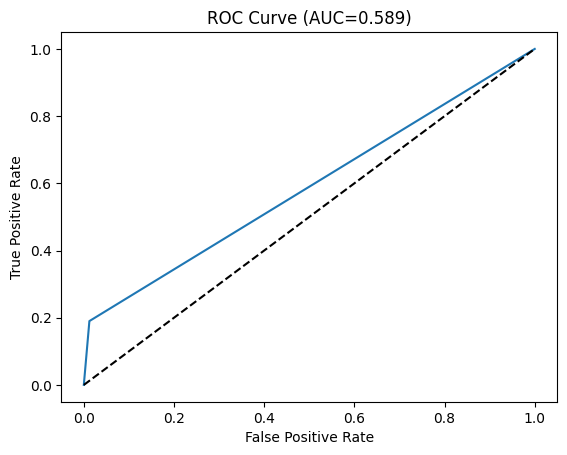

In [109]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Compute the AUC score
auc_score = roc_auc_score(y_test, y_pred)

# Plot the ROC curve
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (AUC={:.3f})'.format(auc_score))
plt.show()

That's it! Well done

**Keep this code safe, as we will use this notebook later on, to build production code, in our next assignement!!**